In [1]:
import sys
!{sys.executable} -m pip install xgboost

In [2]:
import numpy as np
import pandas as pd

# Load data
data=pd.read_csv('Dataset_Wax_Determination.csv')

data.head()

,ID,Type,C1-C3,C4-C7,C8-C15,C16-C22,C23-C29,C30+,SP.GR,T,WAX
0,1,OIL1,2.127,10.306,45.74,19.594,10.0,13.23,0.953,304.15,0.0
1,2,OIL1,2.127,10.306,45.74,19.594,10.0,13.23,0.953,298.00,0.5
2,3,OIL1,2.127,10.306,45.74,19.594,10.0,13.23,0.953,293.00,0.8
3,4,OIL1,2.127,10.306,45.74,19.594,10.0,13.23,0.953,288.00,0.7
4,5,OIL1,2.127,10.306,45.74,19.594,10.0,13.23,0.953,278.00,1.0


In [3]:
df = data.iloc[:, 2:]
display(df)

,C1-C3,C4-C7,C8-C15,C16-C22,C23-C29,C30+,SP.GR,T,WAX
0,2.127,10.306,45.740,19.594,10.0,13.23,0.953,304.15,0.0
1,2.127,10.306,45.740,19.594,10.0,13.23,0.953,298.00,0.5
2,2.127,10.306,45.740,19.594,10.0,13.23,0.953,293.00,0.8
3,2.127,10.306,45.740,19.594,10.0,13.23,0.953,288.00,0.7
4,2.127,10.306,45.740,19.594,10.0,13.23,0.953,278.00,1.0
...,...,...,...,...,...,...,...,...,...
82,1.511,28.232,49.791,20.432,0.0,0.00,0.887,280.00,1.0
83,1.511,28.232,49.791,20.432,0.0,0.00,0.887,270.00,2.8
84,1.511,28.232,49.791,20.432,0.0,0.00,0.887,260.00,2.0
85,1.511,28.232,49.791,20.432,0.0,0.00,0.887,250.00,2.5


In [4]:
# Spliting data into Feature and
X=df.iloc[:, :-1]
y=df.iloc[:,-1]

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # 70% training and 30% test

In [5]:
display(X_train,X_test, y_train,y_test)

,C1-C3,C4-C7,C8-C15,C16-C22,C23-C29,C30+,SP.GR,T
68,0.218,3.057,39.370,57.335,0.000,0.000,0.963,260.00
84,1.511,28.232,49.791,20.432,0.000,0.000,0.887,260.00
65,0.218,3.057,39.370,57.335,0.000,0.000,0.963,286.00
53,1.553,29.590,45.246,24.108,0.000,0.000,0.880,314.15
80,1.511,28.232,49.791,20.432,0.000,0.000,0.887,300.00
...,...,...,...,...,...,...,...,...
20,0.485,16.448,48.931,16.029,6.974,8.177,0.935,275.00
60,1.553,29.590,45.246,24.108,0.000,0.000,0.880,250.00
71,1.778,30.952,47.030,20.183,0.000,0.000,0.872,305.15
14,0.485,16.448,48.931,16.029,6.974,8.177,0.935,312.15


,C1-C3,C4-C7,C8-C15,C16-C22,C23-C29,C30+,SP.GR,T
76,1.778,30.952,47.030,20.183,0.000,0.000,0.872,260.00
0,2.127,10.306,45.740,19.594,10.000,13.230,0.953,304.15
26,0.485,16.448,48.931,16.029,6.974,8.177,0.935,240.00
22,0.485,16.448,48.931,16.029,6.974,8.177,0.935,265.00
12,2.127,10.306,45.740,19.594,10.000,13.230,0.953,239.00
67,0.218,3.057,39.370,57.335,0.000,0.000,0.963,265.00
10,2.127,10.306,45.740,19.594,10.000,13.230,0.953,248.00
18,0.485,16.448,48.931,16.029,6.974,8.177,0.935,285.00
4,2.127,10.306,45.740,19.594,10.000,13.230,0.953,278.00


68    4.5
84    2.0
65    2.3
53    0.0
80    0.2
     ... 
20    2.0
60    4.0
71    0.0
14    0.0
51    5.5
Name: WAX, Length: 78, dtype: float64

76    3.1
0     0.0
26    4.5
22    2.0
12    4.3
67    3.8
10    1.8
18    1.5
4     1.0
Name: WAX, dtype: float64

In [6]:
numerical_features = ['C1-C3','C4-C7','C8-C15','C16-C22','C23-C29','C30+','SP.GR','T']


### Model 01 - Multi-Layer Perceptron

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer

mlp_preprocessor = ColumnTransformer(
    transformers=[
        ("num", QuantileTransformer(n_quantiles=100), numerical_features),
    ]
)
mlp_preprocessor

ColumnTransformer(transformers=[('num', QuantileTransformer(n_quantiles=100),
                                 ['C1-C3', 'C4-C7', 'C8-C15', 'C16-C22',
                                  'C23-C29', 'C30+', 'SP.GR', 'T'])])

In [8]:
from time import time

from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

print("Training MLPRegressor...")
tic = time()
mlp_model = make_pipeline(
    mlp_preprocessor,
    MLPRegressor(
        activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (150, 100, 50), learning_rate= 'adaptive', max_iter= 100, solver= 'adam'

    ),
)
mlp_model.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {mlp_model.score(X_test, y_test):.2f}")

Training MLPRegressor...


C:\Users\AMANMSI\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (100) is greater than the total number of samples (78). n_quantiles is set to n_samples.
  warnings.warn(


done in 0.294s
Test R2 score: 0.18


C:\Users\AMANMSI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
param_grid_mlp = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [10]:
MLPRegressor().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [11]:
from sklearn.model_selection import GridSearchCV
grid_mlp = GridSearchCV(MLPRegressor(), param_grid_mlp, n_jobs= -1, cv=5, verbose= 5)
grid_mlp.fit(X_train, y_train)

print(grid_mlp.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\AMANMSI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [            nan -2.48366388e+01  6.81750092e-01             nan
 -1.78657186e+00  7.37360364e-01             nan -2.23791193e+00
  7.05155314e-01             nan -6.79698396e+00  7.41236872e-01
             nan -8.50324307e+00  6.91613300e-01             nan
 -1.83882110e+00  7.34732585e-01             nan -4.56103385e+01
  7.21291054e-01             nan -1.06236374e+01  7.37763798e-01
             nan -1.22752477e+00  6.83245834e-01             nan
 -5.43208301e-02  7.38251688e-01             nan -2.42868974e+01
  7.02485782e-01             nan -9.79812745e+00  7.28789165e-01
             nan -3.63357474e+00  7.15440193e-01             nan
 -4.23767948e+00  7.40244991e-01             nan -2.34230166e+00
  7.24297133e-01             nan -1.52661246e+01  7.21023251e-01
             nan -3.53410966e-01  6.97935491e-01             nan
 -1.296546

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'invscaling', 'max_iter': 100, 'solver': 'adam'}


C:\Users\AMANMSI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
grid_predictions_mlp = grid_mlp.predict(X_test) 


In [15]:
grid_pred_train_mlp =  grid_mlp.predict(X_train)

In [16]:
grid_pred_all_mlp = grid_mlp.predict(X)

In [17]:
grid_predictions_mlp

array([ 3.35933735, -0.25883532,  4.50888562,  2.01145088,  4.52510247,
        5.53067429,  3.13415041,  0.63447914,  0.76525785])

In [18]:
grid_pred_train_mlp

array([ 6.63151405,  2.53625797,  2.14215578, -0.0347089 ,  0.47886054,
        2.03527036,  1.80616335,  5.64087714,  0.06246831,  0.78202573,
        1.09629339,  4.03104304,  1.08155092,  9.34397365,  5.55795697,
        2.52791797,  4.04457974,  1.02305772,  9.14884324,  2.10267339,
        7.17964843,  1.80109279,  1.20383951,  0.26094078,  0.59103543,
        6.67683297,  1.64497985,  4.00957473,  5.60089881,  0.9980333 ,
        0.43158417,  3.72270503,  2.39407777,  5.32737065,  3.01590691,
        0.31738919,  0.43186088,  8.84411408,  2.0412241 ,  7.20141421,
        1.31212522,  1.381827  ,  8.03439476,  4.9716244 ,  4.1963562 ,
        0.17748226,  0.95627497,  5.35147538,  2.09311062,  3.19264846,
        0.11018135,  8.13083785,  4.81159824,  0.02517265,  1.45559635,
        3.08082694,  3.07937275,  4.07908616,  2.24722155,  4.42453784,
        1.56846059,  3.84369165,  1.59252118,  2.65723492,  8.44234867,
        0.23061589, -0.05879667,  6.73323241,  1.56775166,  0.12

In [47]:
grid_pred_all_mlp

array([-0.25883532, -0.05879667,  0.12108655,  0.31738919,  0.76525785,
        1.02305772,  1.31212522,  1.64497985,  2.0412241 ,  2.52791797,
        3.13415041,  4.03104304,  4.52510247,  5.32737065, -0.21884039,
        0.11018135,  0.26094078,  0.43186088,  0.63447914,  0.9980333 ,
        1.19068962,  1.56775166,  2.01145088,  2.50360599,  3.01590691,
        3.72270503,  4.50888562,  4.81159824,  5.55795697,  0.23061589,
        1.08155092,  2.10267339,  4.42453784,  5.64087714,  6.67683297,
        7.17964843,  8.03439476,  8.44234867,  8.84411408,  9.14884324,
        9.34397365,  0.02517265,  0.59103543,  0.95627497,  1.20383951,
        1.80109279,  2.09311062,  2.39407777,  3.07937275,  4.00957473,
        5.35147538,  6.08878894,  6.73323241, -0.0347089 ,  0.17748226,
        0.78202573,  1.381827  ,  2.24722155,  3.08082694,  3.84369165,
        4.62710717,  5.60089881,  1.45559635,  1.59252118,  1.80616335,
        2.14215578,  4.04457974,  5.53067429,  6.63151405,  7.20

In [20]:
y=df.iloc[:,-1]

In [21]:
from sklearn.metrics import r2_score
print('R2 score: Test', r2_score(y_test, grid_predictions_mlp))
print('R2 score: Train', r2_score(y_train, grid_pred_train_mlp))
print('R2 score: Train', r2_score(y, grid_pred_all_mlp))

R2 score: Test 0.7044155395713289
R2 score: Train 0.890566828381347
R2 score: Train 0.886668293300709


In [22]:
from sklearn.metrics import mean_squared_error
print('RMSE: Test', mean_squared_error(y_test, grid_predictions_mlp))
print('RMSE: Train', mean_squared_error(y_train, grid_pred_train_mlp))
print('RMSE: Train', mean_squared_error(y, grid_pred_all_mlp))

RMSE: Test 0.6405059814128439
RMSE: Train 1.0799275569851816
RMSE: Train 1.0344701526156295


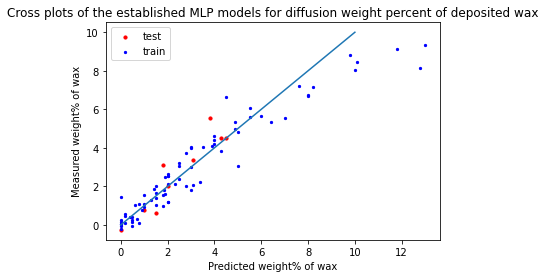

In [23]:
import matplotlib.pyplot as plt
x_line = np.linspace(0, 10, 100)
y_line = np.linspace(0, 10, 100)
# Plot the arrays
plt.scatter(y_test, grid_predictions_mlp,color = 'red', s=10, label = 'test')
plt.scatter(y_train, grid_pred_train_mlp,color = 'blue', s=5, label = 'train')
plt.plot(x_line,y_line)

# Add labels and title
plt.xlabel("Predicted weight% of wax")
plt.ylabel("Measured weight% of wax")
plt.title("Cross plots of the established MLP models for diffusion weight percent of deposited wax")
plt.legend()
# Show the plot
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

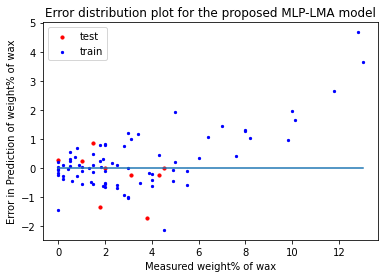

In [24]:
error = []
i=0
error = y_test-grid_predictions_mlp
plt.scatter(y_test, error, color='red', s=10, label = 'test')
error_pred = y_train-grid_pred_train_mlp
plt.scatter(y_train, error_pred, color = 'blue', s=5, label = 'train')
x = [0,13]
y_1 = [0,0]
plt.plot(x,y_1)
plt.ylabel("Error in Prediction of weight% of wax")
plt.xlabel("Measured weight% of wax")
plt.title("Error distribution plot for the proposed MLP-LMA model")
plt.legend()
plt.plot


In [25]:
import sys
!{sys.executable} -m pip install scikit-optimize

In [26]:
MLPRegressor().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

### Model 02 - SVM

In [27]:
from sklearn.svm import SVR

In [30]:
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['linear', 'rbf'],
    'degree' : [3,4,5,6]
}

svr = SVR(kernel ='rbf')

grid_svm = GridSearchCV(svr, param_grid, refit = True, cv=5, scoring='neg_mean_squared_error', verbose = 3)

#fitting the model for grid search
grid_svm.fit(X_train,y_train)
print("best parameters are:", grid_svm.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-3.693 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-5.422 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-4.635 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-4.800 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-2.725 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-11.201 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-11.904 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-12.520 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-10.962 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-8.738 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, gamma=0.1, kernel=linear;

[CV 5/5] END C=0.001, degree=5, gamma=0.01, kernel=rbf;, score=-8.730 total time=   0.0s
[CV 1/5] END C=0.001, degree=5, gamma=0.001, kernel=linear;, score=-3.693 total time=   0.0s
[CV 2/5] END C=0.001, degree=5, gamma=0.001, kernel=linear;, score=-5.422 total time=   0.0s
[CV 3/5] END C=0.001, degree=5, gamma=0.001, kernel=linear;, score=-4.635 total time=   0.0s
[CV 4/5] END C=0.001, degree=5, gamma=0.001, kernel=linear;, score=-4.800 total time=   0.0s
[CV 5/5] END C=0.001, degree=5, gamma=0.001, kernel=linear;, score=-2.725 total time=   0.0s
[CV 1/5] END C=0.001, degree=5, gamma=0.001, kernel=rbf;, score=-11.168 total time=   0.0s
[CV 2/5] END C=0.001, degree=5, gamma=0.001, kernel=rbf;, score=-11.882 total time=   0.0s
[CV 3/5] END C=0.001, degree=5, gamma=0.001, kernel=rbf;, score=-12.489 total time=   0.0s
[CV 4/5] END C=0.001, degree=5, gamma=0.001, kernel=rbf;, score=-10.942 total time=   0.0s
[CV 5/5] END C=0.001, degree=5, gamma=0.001, kernel=rbf;, score=-8.701 total time=

[CV 2/5] END C=0.01, degree=4, gamma=1, kernel=linear;, score=-3.441 total time=   0.0s
[CV 3/5] END C=0.01, degree=4, gamma=1, kernel=linear;, score=-3.246 total time=   0.0s
[CV 4/5] END C=0.01, degree=4, gamma=1, kernel=linear;, score=-4.090 total time=   0.0s
[CV 5/5] END C=0.01, degree=4, gamma=1, kernel=linear;, score=-2.322 total time=   0.0s
[CV 1/5] END C=0.01, degree=4, gamma=1, kernel=rbf;, score=-11.201 total time=   0.0s
[CV 2/5] END C=0.01, degree=4, gamma=1, kernel=rbf;, score=-11.892 total time=   0.0s
[CV 3/5] END C=0.01, degree=4, gamma=1, kernel=rbf;, score=-12.511 total time=   0.0s
[CV 4/5] END C=0.01, degree=4, gamma=1, kernel=rbf;, score=-10.950 total time=   0.0s
[CV 5/5] END C=0.01, degree=4, gamma=1, kernel=rbf;, score=-8.737 total time=   0.0s
[CV 1/5] END C=0.01, degree=4, gamma=0.1, kernel=linear;, score=-4.143 total time=   0.0s
[CV 2/5] END C=0.01, degree=4, gamma=0.1, kernel=linear;, score=-3.441 total time=   0.0s
[CV 3/5] END C=0.01, degree=4, gamma=0.

[CV 5/5] END C=0.01, degree=6, gamma=0.001, kernel=linear;, score=-2.322 total time=   0.0s
[CV 1/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-10.875 total time=   0.0s
[CV 2/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-11.686 total time=   0.0s
[CV 3/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-12.201 total time=   0.0s
[CV 4/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-10.653 total time=   0.0s
[CV 5/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-8.381 total time=   0.0s
[CV 1/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-4.143 total time=   0.0s
[CV 2/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-3.441 total time=   0.0s
[CV 3/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-3.246 total time=   0.0s
[CV 4/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-4.090 total time=   0.0s
[CV 5/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-2.322 total time=  

[CV 4/5] END C=0.1, degree=4, gamma=0.001, kernel=linear;, score=-4.145 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=0.001, kernel=linear;, score=-2.274 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-8.753 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-9.720 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-9.577 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-8.529 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-6.117 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=0.0001, kernel=linear;, score=-4.551 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=0.0001, kernel=linear;, score=-2.452 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=0.0001, kernel=linear;, score=-2.777 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=0.0001, kernel=linear;, score=-4.145 total time=   0.0s
[CV 5/5] E

[CV 5/5] END C=0.1, degree=6, gamma=0.01, kernel=rbf;, score=-8.000 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-4.551 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-2.452 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-2.777 total time=   0.0s
[CV 4/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-4.145 total time=   0.0s
[CV 5/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-2.274 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, gamma=0.001, kernel=rbf;, score=-8.753 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, gamma=0.001, kernel=rbf;, score=-9.720 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, gamma=0.001, kernel=rbf;, score=-9.577 total time=   0.0s
[CV 4/5] END C=0.1, degree=6, gamma=0.001, kernel=rbf;, score=-8.529 total time=   0.0s
[CV 5/5] END C=0.1, degree=6, gamma=0.001, kernel=rbf;, score=-6.117 total time=   0.0s
[CV 1/5] END C=0.1

[CV 3/5] END C=1, degree=4, gamma=0.0001, kernel=linear;, score=-1.715 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=0.0001, kernel=linear;, score=-5.042 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=0.0001, kernel=linear;, score=-2.959 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=0.0001, kernel=rbf;, score=-4.893 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=0.0001, kernel=rbf;, score=-6.858 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=0.0001, kernel=rbf;, score=-6.244 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=0.0001, kernel=rbf;, score=-5.595 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=0.0001, kernel=rbf;, score=-3.468 total time=   0.0s
[CV 1/5] END C=1, degree=5, gamma=1, kernel=linear;, score=-3.842 total time=   0.0s
[CV 2/5] END C=1, degree=5, gamma=1, kernel=linear;, score=-1.876 total time=   0.0s
[CV 3/5] END C=1, degree=5, gamma=1, kernel=linear;, score=-1.715 total time=   0.0s
[CV 4/5] END C=1, degree=5, gamma=1, ker

[CV 1/5] END C=10, degree=3, gamma=1, kernel=linear;, score=-3.652 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=1, kernel=linear;, score=-1.979 total time=   0.2s
[CV 3/5] END C=10, degree=3, gamma=1, kernel=linear;, score=-1.842 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=1, kernel=linear;, score=-5.195 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=linear;, score=-3.054 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=-10.756 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=-10.150 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=-10.184 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=-9.195 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=-9.427 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.1, kernel=linear;, score=-3.652 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.1, kernel=linear;, score=-1

[CV 5/5] END C=10, degree=4, gamma=0.0001, kernel=linear;, score=-3.054 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=0.0001, kernel=rbf;, score=-2.455 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=0.0001, kernel=rbf;, score=-3.177 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=0.0001, kernel=rbf;, score=-2.555 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=0.0001, kernel=rbf;, score=-2.932 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=0.0001, kernel=rbf;, score=-1.141 total time=   0.0s
[CV 1/5] END C=10, degree=5, gamma=1, kernel=linear;, score=-3.652 total time=   0.0s
[CV 2/5] END C=10, degree=5, gamma=1, kernel=linear;, score=-1.979 total time=   0.2s
[CV 3/5] END C=10, degree=5, gamma=1, kernel=linear;, score=-1.842 total time=   0.0s
[CV 4/5] END C=10, degree=5, gamma=1, kernel=linear;, score=-5.195 total time=   0.0s
[CV 5/5] END C=10, degree=5, gamma=1, kernel=linear;, score=-3.054 total time=   0.0s
[CV 1/5] END C=10, degree=5, gamma=1, k

[CV 2/5] END C=10, degree=6, gamma=0.0001, kernel=linear;, score=-1.979 total time=   0.2s
[CV 3/5] END C=10, degree=6, gamma=0.0001, kernel=linear;, score=-1.842 total time=   0.0s
[CV 4/5] END C=10, degree=6, gamma=0.0001, kernel=linear;, score=-5.195 total time=   0.0s
[CV 5/5] END C=10, degree=6, gamma=0.0001, kernel=linear;, score=-3.054 total time=   0.1s
[CV 1/5] END C=10, degree=6, gamma=0.0001, kernel=rbf;, score=-2.455 total time=   0.0s
[CV 2/5] END C=10, degree=6, gamma=0.0001, kernel=rbf;, score=-3.177 total time=   0.0s
[CV 3/5] END C=10, degree=6, gamma=0.0001, kernel=rbf;, score=-2.555 total time=   0.0s
[CV 4/5] END C=10, degree=6, gamma=0.0001, kernel=rbf;, score=-2.932 total time=   0.0s
[CV 5/5] END C=10, degree=6, gamma=0.0001, kernel=rbf;, score=-1.141 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=1, kernel=linear;, score=-2.886 total time=   0.6s
[CV 2/5] END C=100, degree=3, gamma=1, kernel=linear;, score=-1.824 total time=   1.2s
[CV 3/5] END C=100, de

[CV 5/5] END C=100, degree=4, gamma=0.001, kernel=linear;, score=-3.089 total time=   0.6s
[CV 1/5] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=-0.734 total time=   0.0s
[CV 2/5] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=-0.224 total time=   0.0s
[CV 3/5] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=-0.393 total time=   0.0s
[CV 4/5] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=-2.024 total time=   0.0s
[CV 5/5] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=-0.470 total time=   0.0s
[CV 1/5] END C=100, degree=4, gamma=0.0001, kernel=linear;, score=-2.886 total time=   0.6s
[CV 2/5] END C=100, degree=4, gamma=0.0001, kernel=linear;, score=-1.824 total time=   1.1s
[CV 3/5] END C=100, degree=4, gamma=0.0001, kernel=linear;, score=-3.089 total time=   0.4s
[CV 4/5] END C=100, degree=4, gamma=0.0001, kernel=linear;, score=-4.274 total time=   0.7s
[CV 5/5] END C=100, degree=4, gamma=0.0001, kernel=linear;, score=-3.089 total time=   0.6s
[CV 1/5] 

[CV 1/5] END C=100, degree=6, gamma=0.001, kernel=linear;, score=-2.886 total time=   0.6s
[CV 2/5] END C=100, degree=6, gamma=0.001, kernel=linear;, score=-1.824 total time=   1.0s
[CV 3/5] END C=100, degree=6, gamma=0.001, kernel=linear;, score=-3.089 total time=   0.4s
[CV 4/5] END C=100, degree=6, gamma=0.001, kernel=linear;, score=-4.274 total time=   0.8s
[CV 5/5] END C=100, degree=6, gamma=0.001, kernel=linear;, score=-3.089 total time=   0.5s
[CV 1/5] END C=100, degree=6, gamma=0.001, kernel=rbf;, score=-0.734 total time=   0.0s
[CV 2/5] END C=100, degree=6, gamma=0.001, kernel=rbf;, score=-0.224 total time=   0.0s
[CV 3/5] END C=100, degree=6, gamma=0.001, kernel=rbf;, score=-0.393 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=0.001, kernel=rbf;, score=-2.024 total time=   0.0s
[CV 5/5] END C=100, degree=6, gamma=0.001, kernel=rbf;, score=-0.470 total time=   0.0s
[CV 1/5] END C=100, degree=6, gamma=0.0001, kernel=linear;, score=-2.886 total time=   0.6s
[CV 2/5] END 

In [32]:
grid_predictions_svm = grid_svm.predict(X_test)
grid_pred_train_svm = grid_svm.predict(X_train)
grid_pred_all_svm = grid_svm.predict(X)

In [33]:
from sklearn.metrics import r2_score
print('R2 score: Test', r2_score(y_test, grid_predictions_svm))
print('R2 score: Train', r2_score(y_train, grid_pred_train_svm))
print('R2 score: Train', r2_score(y, grid_pred_all_svm))

R2 score: Test 0.8916739637111549
R2 score: Train 0.9805125270477135
R2 score: Train 0.9784506526780343


In [34]:
from sklearn.metrics import mean_squared_error
print('RMSE: Test', mean_squared_error(y_test, grid_predictions_svm))
print('RMSE: Train', mean_squared_error(y_train, grid_pred_train_svm))
print('RMSE: All Data', mean_squared_error(y, grid_pred_all_svm))

RMSE: Test 0.23473315912861828
RMSE: Train 0.1923096876924512
RMSE: All Data 0.19669832266860643


In [66]:
from sklearn.inspection import permutation_importance
#permutation importance
results = permutation_importance(grid_svm, X_train, y_train, scoring = 'neg_mean_squared_error')

#get feature importance
importance = results.importances_mean

In [67]:
list_features = ['C1-C3', 'C4-C7','C8-C15','C16-C22','C-23-C29','C30+','sp. gr','T']
#summarize feature importance 
j=0
for i,v in enumerate(importance):
    print(list_features[j],'Feature: %0d, Score: %.5f' %(i,v))
    j+=1

C1-C3 Feature: 0, Score: 0.00601
C4-C7 Feature: 1, Score: 3.93125
C8-C15 Feature: 2, Score: 3.30178
C16-C22 Feature: 3, Score: 6.20917
C-23-C29 Feature: 4, Score: 0.10839
C30+ Feature: 5, Score: 0.13212
sp. gr Feature: 6, Score: 0.00001
T Feature: 7, Score: 15.62192


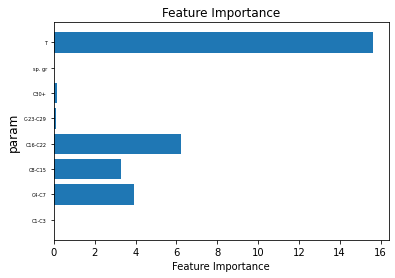

In [68]:
plt.barh(list_features, importance)

# setting label of y-axis 
# setting label of x-axis
plt.xlabel("Feature Importance")
plt.ylabel('param', fontsize = 12)
plt.yticks(fontsize = 5)
plt.title("Feature Importance")
plt.show()

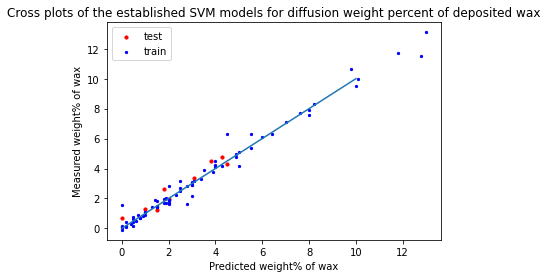

In [74]:
import matplotlib.pyplot as plt
x_line = np.linspace(0, 10, 100)
y_line = np.linspace(0, 10, 100)
# Plot the arrays
plt.scatter(y_test, grid_predictions_svm,color = 'red', s=10, label = 'test')
plt.scatter(y_train, grid_pred_train_svm,color = 'blue', s=5, label = 'train')
plt.plot(x_line,y_line)

# Add labels and title
plt.xlabel("Predicted weight% of wax")
plt.ylabel("Measured weight% of wax")
plt.title("Cross plots of the established SVM models for diffusion weight percent of deposited wax")
plt.legend()
# Show the plot
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

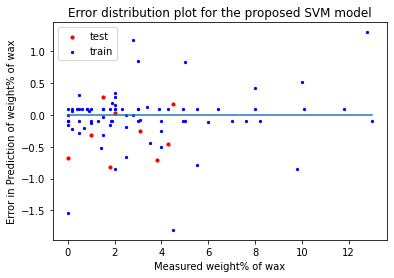

In [73]:
error = []
i=0
error = y_test-grid_predictions_svm
plt.scatter(y_test, error, color='red', s=10, label = 'test')
error_pred = y_train-grid_pred_train_svm
plt.scatter(y_train, error_pred, color = 'blue', s=5, label = 'train')
x = [0,13]
y_1 = [0,0]
plt.plot(x,y_1)
plt.ylabel("Error in Prediction of weight% of wax")
plt.xlabel("Measured weight% of wax")
plt.title("Error distribution plot for the proposed SVM model")
plt.legend()
plt.plot


### Model - 03 XGBoost

In [35]:
import xgboost as xgb
import sklearn
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001,0.01,0.1,0.3,1], 'n_estimators': [10,100,1000,10000,100000]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
print("done grid search")
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

done grid search
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best set of hyperparameters:  {'learning_rate': 0.1, 'n_estimators': 100}
Best score:  -1.4465210093202496


In [61]:
feature_importance_weight = grid_search.best_estimator_.get_booster().get_score(importance_type='weight')

In [63]:
grid_search.best_estimator_.get_booster().get_score(importance_type='weight')

{'C1-C3': 617.0,
 'C4-C7': 100.0,
 'C8-C15': 332.0,
 'C16-C22': 128.0,
 'SP.GR': 14.0,
 'T': 1415.0}

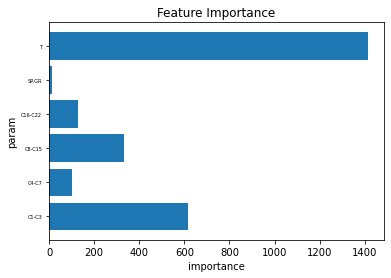

In [62]:
y_feature=list(feature_importance_weight.keys())
 
# getting values against each value of y
x_feature=list(feature_importance_weight.values())
plt.barh(y_feature, x_feature)
# setting label of y-axis
plt.ylabel("param")
plt.yticks(fontsize = 5) 
# setting label of x-axis
plt.xlabel("importance")
plt.title("Feature Importance")
plt.show()

In [36]:
import xgboost as xgb

In [37]:
grid_predictions_xgb = grid_search.predict(X_test)
grid_pred_train_xgb = grid_search.predict(X_train)
grid_pred_all_xgb = grid_search.predict(X)

In [38]:
from sklearn.metrics import r2_score
print('R2 score: Test', r2_score(y_test, grid_predictions_xgb))
print('R2 score: Train', r2_score(y_train, grid_pred_train_xgb))
print('R2 score: Train', r2_score(y, grid_pred_all_xgb))

R2 score: Test 0.7795013446999628
R2 score: Train 0.9998990787164677
R2 score: Train 0.9944871055674214


In [39]:
from sklearn.metrics import mean_squared_error
print('RMSE: Test', mean_squared_error(y_test, grid_predictions_xgb))
print('RMSE: Train', mean_squared_error(y_train, grid_pred_train_xgb))
print('RMSE: All Data', mean_squared_error(y, grid_pred_all_xgb))

RMSE: Test 0.4778015305958335
RMSE: Train 0.0009959290547905525
RMSE: All Data 0.05032064645558809


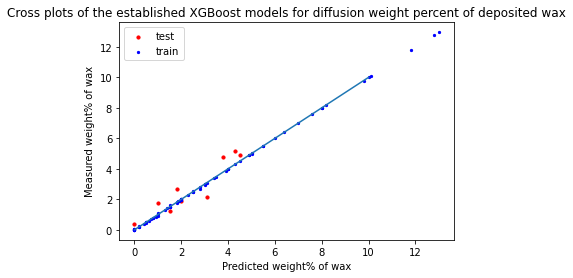

In [71]:
import matplotlib.pyplot as plt
x_line = np.linspace(0, 10, 100)
y_line = np.linspace(0, 10, 100)
# Plot the arrays
plt.scatter(y_test, grid_predictions_xgb,color = 'red', s=10, label = 'test')
plt.scatter(y_train, grid_pred_train_xgb,color = 'blue', s=5, label = 'train')
plt.plot(x_line,y_line)

# Add labels and title
plt.xlabel("Predicted weight% of wax")
plt.ylabel("Measured weight% of wax")
plt.title("Cross plots of the established XGBoost models for diffusion weight percent of deposited wax")
plt.legend()
# Show the plot
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

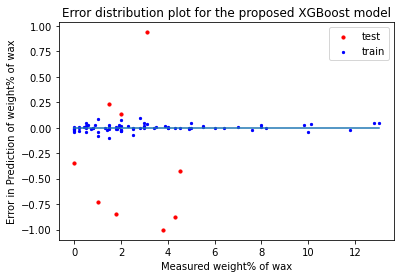

In [72]:
error = []
i=0
error = y_test-grid_predictions_xgb
plt.scatter(y_test, error, color='red', s=10, label = 'test')
error_pred = y_train-grid_pred_train_xgb
plt.scatter(y_train, error_pred, color = 'blue', s=5, label = 'train')
x = [0,13]
y_1 = [0,0]
plt.plot(x,y_1)
plt.ylabel("Error in Prediction of weight% of wax")
plt.xlabel("Measured weight% of wax")
plt.title("Error distribution plot for the proposed XGBoost model")
plt.legend()
plt.plot


### Model - 04 LightGBM

In [40]:
import sys
!{sys.executable} -m pip install lightGBM

In [41]:
import lightgbm as lgb

In [42]:
hyperparameter_grid = {
    'num_leaves': [31, 63, 127],
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0],
}

In [43]:
lgb_model = lgb.LGBMRegressor()

# Create a GridSearchCV object
grid_search_lgbm = GridSearchCV(lgb_model, hyperparameter_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model
grid_search_lgbm.fit(X_train, y_train)

# Get the best model
best_model = grid_search_lgbm.best_estimator_



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 78, number of used features: 8
[LightGBM] [Info] Start training from score 3.222436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [44]:
grid_predictions_lgbm = best_model.predict(X_test)
grid_pred_train_lgbm = best_model.predict(X_train)
grid_pred_all_lgbm = best_model.predict(X)

In [45]:
from sklearn.metrics import r2_score
print('R2 score: Test', r2_score(y_test, grid_predictions_lgbm))
print('R2 score: Train', r2_score(y_train, grid_pred_train_lgbm))
print('R2 score: Train', r2_score(y, grid_pred_all_lgbm))

R2 score: Test 0.23695336989745275
R2 score: Train 0.8649281515414236
R2 score: Train 0.8503368625313026


In [46]:
from sklearn.metrics import mean_squared_error
print('RMSE: Test', mean_squared_error(y_test, grid_predictions_lgbm))
print('RMSE: Train', mean_squared_error(y_train, grid_pred_train_lgbm))
print('RMSE: All Data', mean_squared_error(y, grid_pred_all_lgbm))

RMSE: Test 1.6534561051308527
RMSE: Train 1.3329396303312466
RMSE: All Data 1.366096507034654


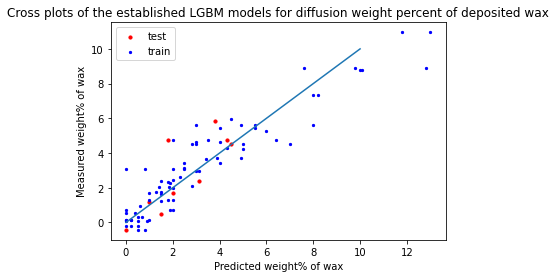

In [70]:
import matplotlib.pyplot as plt
x_line = np.linspace(0, 10, 100)
y_line = np.linspace(0, 10, 100)
# Plot the arrays
plt.scatter(y_test, grid_predictions_lgbm,color = 'red', s=10, label = 'test')
plt.scatter(y_train, grid_pred_train_lgbm,color = 'blue', s=5, label = 'train')
plt.plot(x_line,y_line)

# Add labels and title
plt.xlabel("Predicted weight% of wax")
plt.ylabel("Measured weight% of wax")
plt.title("Cross plots of the established LGBM models for diffusion weight percent of deposited wax")
plt.legend()
# Show the plot
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

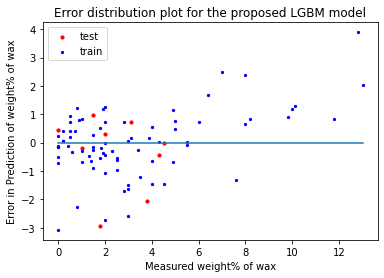

In [69]:
error = []
i=0
error = y_test-grid_predictions_lgbm
plt.scatter(y_test, error, color='red', s=10, label = 'test')
error_pred = y_train-grid_pred_train_lgbm
plt.scatter(y_train, error_pred, color = 'blue', s=5, label = 'train')
x = [0,13]
y_1 = [0,0]
plt.plot(x,y_1)
plt.ylabel("Error in Prediction of weight% of wax")
plt.xlabel("Measured weight% of wax")
plt.title("Error distribution plot for the proposed LGBM model")
plt.legend()
plt.plot